<img src="Images/untref.png"/>

# Señales y sistemas

En esta primera parte de este trabajo practico se desarrollaron herramientas de código que sirven para generar señales, aplicar transformaciones y operciones, producir gráficos y controlar la lectura y escritura de archivos.
Los módulos creados fueron $generate.py$ que contiene funciones generadoras de señales, $modify.py$ que consiste en fuciones que modificán dichas señales, $plot.py$ que grafica, carga y guarda estas señales y finalmente $convolution\_reverb.py$ que crea un impulso sintético y lo convoluciona con una señal de audio para proporcionar reverv y un piso de ruido.
Luego a partir de los módulos desarrollados en el lenguaje python se resolvieron las siguientes consignas.

In [2]:
# Imports
import generate as gen
import modify as mod
import plot as pl
import numpy as np

$1)$Se genera una señal impulso que vaya de n=-10 a n=10, con el impulso en n=0 y se desplaza
temporalmente 5 muestras. Se genera otra señal impulso que vaya de n=-10 a n=10, con
el impulso en n=0 y se desplaza temporalmente -5 muestras. Se suma ambos impulsos y luego se grafica. Finalmente se guarda el resultado de la suma en formato numpy.

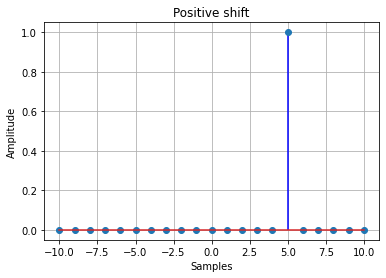

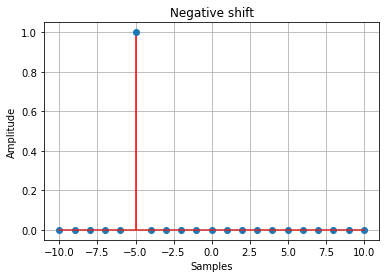

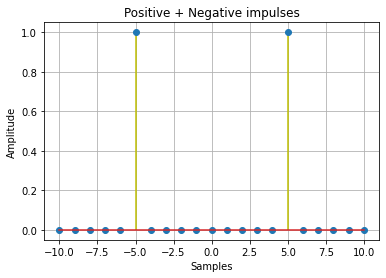

In [3]:
# Generate the signals
samples_1, impulse_1 = gen.unit_impulse(start=-10, end=10, amplitude=1, shift=5)
samples_2, impulse_2 = gen.unit_impulse(start=-10, end=10, amplitude=1, shift=-5)

# Add the signals
samples_sum, impulse_sum = mod.addition(samples_1, impulse_1, samples_2, impulse_2)

# Plot the signals
pl.stem_signal(samples_1, impulse_1, title="Positive shift")
pl.stem_signal(samples_2, impulse_2, title="Negative shift", color = "r")
pl.stem_signal(samples_sum, impulse_sum, title="Positive + Negative impulses", npy_saves=True, color = "y") # to save change npy_save=True

$2)$Se genera una señal aleatoria que vaya de n=0 a n=25, con media=1 y desvio=2. Se genera
otra señal de tipo exponencial, que vaya de n=0 a n=25, con base=3. Se multiplica ambas
señales y se grafica el resultado como se puede observar en el gráfico de las exponenciales la amplitud está en un escala logaritmica. Finalmente se guarda el resultado de la suma en formato numpy.

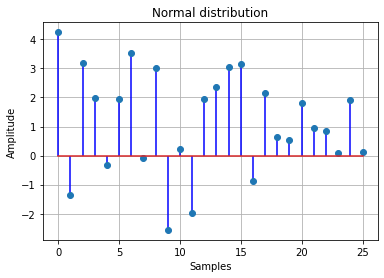

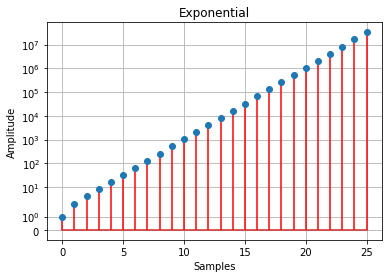

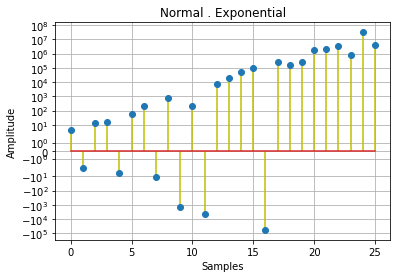

In [6]:
# Generate the signals
samples_1, norm = gen.normal_signal(start=0, end=25, mean=1, std_dev=2)
samples_2, exp = gen.exponential_signal(start=0, end=25, amplitude = 1, base = 2 )

# Multiply the signals
samples_mult, mult = mod.multiplication(samples_1, norm, samples_2, exp)

# Plot the signals
pl.stem_signal(samples_1, norm, title="Normal distribution")
pl.stem_signal(samples_2, exp, title="Exponential", log_scale_y=True, color = "r")
pl.stem_signal(samples_mult, mult, title="Normal . Exponential", npy_saves=True, log_scale_y=True, color = "y")

$3)$Se genera un pulso triangular que vaya de n=-10 a n=10, con un factor=5. Se genera otra
señal de tipo aleatorio que vaya de n=-10 a n=10, con media=0 y desvio=1. Se suma ambas
señales y se grafican en cada paso. Finalmete se guardar el resultado de la suma en formato numpy.

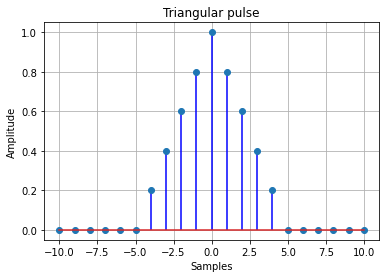

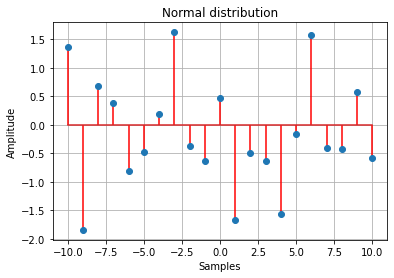

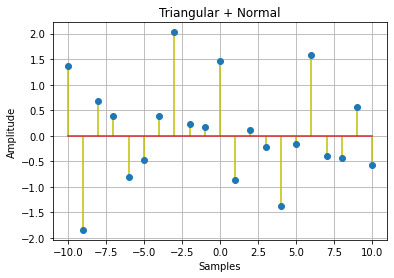

In [7]:
# Generate the signals
samples_1, triangle = gen.triangular_pulse(start=-10, end=10, amplitude=1, width=10)
samples_2, norm = gen.normal_signal(start=-10, end=10, mean=0, std_dev=1)

# Add the signals
samples_add, addition = mod.addition(samples_1, triangle, samples_2, norm)

# Plot the signals
pl.stem_signal(samples_1, triangle, title="Triangular pulse")
pl.stem_signal(samples_2, norm, title="Normal distribution",color = "r")
pl.stem_signal(samples_add, addition, title="Triangular + Normal", npy_saves=True,color = "y")

$4)$Se generar un escalón unitario que vaya desde n=-5 a n=15, con el escalón iniciando en
n=5. Se genera un pulso unitario que vaya de n=-15 a n=15 con el pulso iniciando en n=-
10 y terminando en n=10. Se suma ambas señales (escalón + pulso).Finalmente se grafica y se guarda el
resultado en formato numpy.

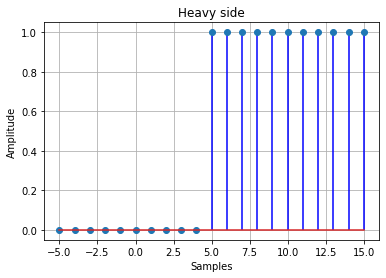

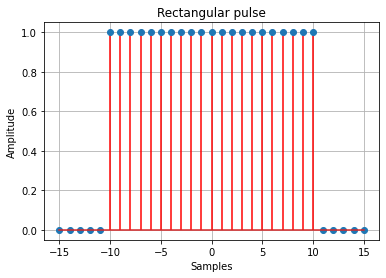

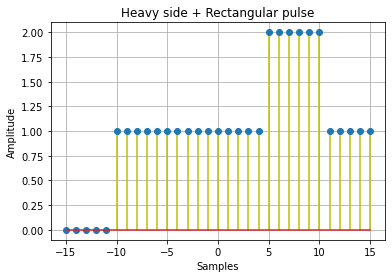

In [8]:
# Generate the signals
samples_1, hs = gen.heavy_side(start=-5, end=15, shift=5)
samples_2, pulse = gen.rectangular_pulse(start=-15, end=15, width=20)

# Add the signals
samples_add, addition = mod.addition(samples_1, hs, samples_2, pulse)

# Plot the signals
pl.stem_signal(samples_1, hs, title="Heavy side")
pl.stem_signal(samples_2, pulse, title="Rectangular pulse", color = "r")
pl.stem_signal(samples_add, addition, title="Heavy side + Rectangular pulse", npy_saves=True,color = "y")

$5)$Se carga la señal guardada del inciso anterior y se invierte temporalmente. Se carga la señal resultante del primer inciso. Luego se convoluciona estas dos señales cargadas y se grafica el resultado. Finalemete se guarda el grafico en formato png.

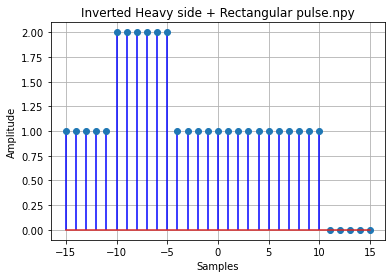

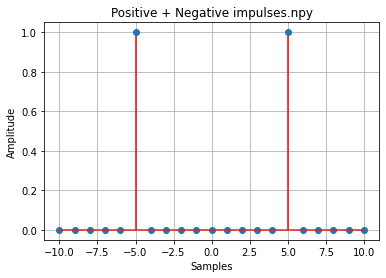

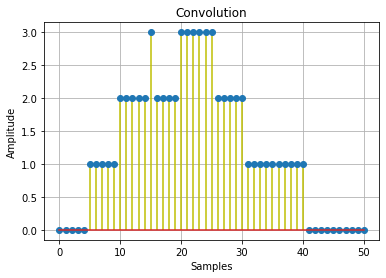

In [9]:
# Load the signals
samples_04, signal_04 = pl.npy_load("Heavy side + Rectangular pulse")
samples_01, signal_01 = pl.npy_load("Positive + Negative impulses")

# Invert signal_04
signal_inv = mod.invert_time(signal_04)

# Convolves signals
conv = mod.convolution(signal_inv, signal_01)

# Create sample array 
samples_conv = range(len(conv))

# Plot the signals
pl.stem_signal(samples_04, signal_inv, title="Inverted Heavy side + Rectangular pulse.npy")
pl.stem_signal(samples_01, signal_01, title="Positive + Negative impulses.npy", color = "r")
pl.stem_signal(samples_conv, conv, title="Convolution", png_save=True, color = "y")